In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import griddata
from IPython.display import Image
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', size=22)
plt.gcf().tight_layout()

pi=np.pi

<Figure size 432x288 with 0 Axes>

# Problem 1

The hyperbolic odes are of form $au_x+bu_y=0$. This can be inferred as u is constant along the vector (a,b) as it can be interpreted as the directional derivative of u in (a,b) direction is zero. ie $(a,b).grad(u)=0$. So our solution is: 

$u \ along (a,b)= constant$.
In otherwords $u(bx-ay)=k$ would be the solution.

# Problem 2

The burger's equation can be interpreted as hyperbolic equation because it resembles the form $a_t+u*a_x$, except instead of a, we have u, meaning the velocity itself is convected by the velocity. This is non-linear because we can't directly solved u by charactertistc curves. In other words, the characteristic curves intersect with each other at some point making it impossible to track which characteristic curve velocity would follow.

In terms of fluids, burger's equation is used to represent shockwaves and rarefaction. Shockwave is when the velocity catches up and rarefaction is when the velocites don't catch up and leaving space between them.

# Problem 3

In [3]:
def Gaussian(x):
    xc=x[int(len(x)/2+1)]
    return np.exp(-0.25*(x-xc)**2/0.001)+1

In [4]:
def Hat(x):
    a=np.zeros_like(x)
    for xp in range(len(x)):
        if ((x[xp]>=1/3)and(x[xp]<2/3)):
            a[xp]=1
    return a

In [7]:
def upwind_adv(delx,c):
    u=1
    xmax= 1
    tmax=1/u
    delt=c*delx/u
    x=np.arange(0,1,delx)

    #Initial Condition
    #a= Gaussian(x)
    a= Hat(x)

    #Solving
    t=0
    while (t<tmax):
        a=a-c*(a-np.roll(a,1))
        t=t+delt
    return x,a

## Gaussian

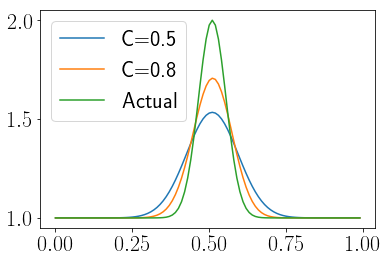

In [227]:
x,a=upwind_adv(0.01,0.5)
plt.plot(x,a,label='C=0.5')
x,a=upwind_adv(0.01,0.8)
plt.plot(x,a,label='C=0.8')
plt.plot(x,Gaussian(x),label='Actual')
plt.legend()
plt.show()

## Hat

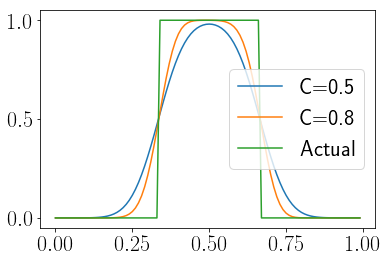

In [229]:
x,a=upwind_adv(0.01,0.5)
plt.plot(x,a,label='C=0.5')
x,a=upwind_adv(0.01,0.8)
plt.plot(x,a,label='C=0.8')
plt.plot(x,Hat(x),label='Actual')
plt.legend()
plt.show()

# Problem 4

In [230]:
def upwind_adv_implicit(delx,c):
    u=1
    xmax= 1
    tmax=1/u
    delt=c*delx/u
    x=np.arange(0,1,delx)

    #Initial Condition
    #a= Gaussian(x)
    a= Hat(x)
    
    nx=len(x)
    C= -c*np.eye(nx,nx,k=-1)+(1+c)*np.eye(nx,nx,k=0)\
        -c*np.eye(nx,nx,k=nx-1)    
    #Solving
    t=0
    while (t<tmax):
        a=np.linalg.solve(C,a)
        t=t+delt
    return x,a

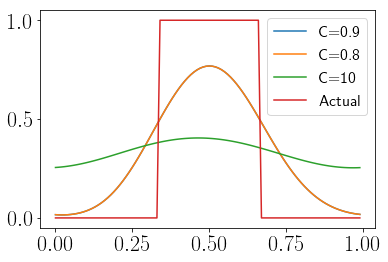

In [231]:
x,a=upwind_adv_implicit(0.01,0.9)
plt.plot(x,a,label='C=0.9')
x,a=upwind_adv_implicit(0.01,0.9)
plt.plot(x,a,label='C=0.8')
x,a=upwind_adv_implicit(0.01,10)
plt.plot(x,a,label='C=10')
plt.plot(x,Hat(x),label='Actual')
plt.legend(fontsize=16)
plt.show()

From the above graph, we can see that dx=0.1 and dx=0.001 are both stable and we can get a solution but dx=0.001 is closer to the solution. Here dx=0.1 and 0.001 are both stable but dx=0.001 is more accurate. Thus, stability means the solution won't blow up and accuracy means how closer the numerical solution is to the actual solution.

# Problem 5

In [2]:
def upwind_adv_2nd(delx,c):
    u=1
    xmax= 1
    tmax=abs(1/u)
    delt=abs(c*delx/u)
    x=np.arange(0,1,delx)
    def Rei(a):
        if (u>0):
            return a+1/4*(1-delt*u/delx)*\
                    (np.roll(a,-1)-np.roll(a,1))
        else:
            return np.roll(a,-1)-1/4*(1+delt*u/delx)*\
                    (np.roll(a,-2)-a)
    a= Hat(x)
    
    c=u*delt/delx # Reinitilize incase u is negative
    #Solving
    t=0
    while (t<tmax):
        a=a-c*(Rei(a)-Rei(np.roll(a,1)))
        t=t+delt
    return x,a

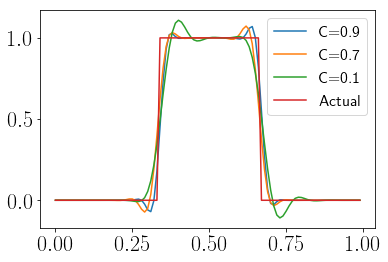

In [278]:
x,a=upwind_adv_2nd(0.01,0.9)
plt.plot(x,a,label='C=0.9')
x,a=upwind_adv_2nd(0.01,0.7)
plt.plot(x,a,label='C=0.7')
x,a=upwind_adv_2nd(0.01,0.1)
plt.plot(x,a,label='C=0.1')
plt.plot(x,Hat(x),label='Actual')
plt.legend(fontsize=16)
plt.show()

## Comparison of Second and first order:

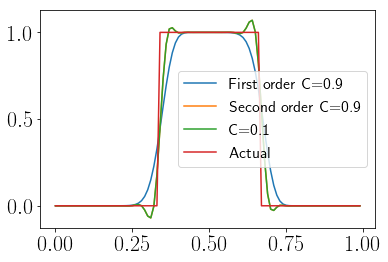

In [16]:
x,a=upwind_adv(0.01,0.9)
plt.plot(x,a,label='First order C=0.9')
x,a=upwind_adv_2nd(0.01,0.9)
plt.plot(x,a,label='Second order C=0.9')
plt.plot(x,a,label='C=0.1')
plt.plot(x,Hat(x),label='Actual')
plt.legend(fontsize=16)
plt.show()